In [1]:
! pip install ./python_files
from python_files import *
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()
# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available, training on: ", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


Processing c:\users\tbird\documents\github\06-665-psm-final-project\python_files
  Created wheel for python-files: filename=python_files-0.1.0-py3-none-any.whl size=1023 sha256=891a5528a7614a46e60caf17b829acb0bf4bdee85161b1cd171867a9c3e58e0f
  Stored in directory: C:\Users\tbird\AppData\Local\Temp\pip-ephem-wheel-cache-q5tenmpe\wheels\ca\c1\3d\7f33f532b3f9eddd59bbd2ddd1f7583d50a6829274a8d07efa
Successfully built python-files
  Attempting uninstall: python-files
    Found existing installation: python-files 0.1.0
    Uninstalling python-files-0.1.0:
      Successfully uninstalled python-files-0.1.0
GPU is available, training on:  NVIDIA GeForce RTX 2070 Super with Max-Q Design


# Training the NN

### Getting data for the NN training

num_timesteps = 500
1/1
ODE solution found: True
Saved: 
1_solutions.npy: (1, 6, 500)
1_F_ag.npy: (1, 500)


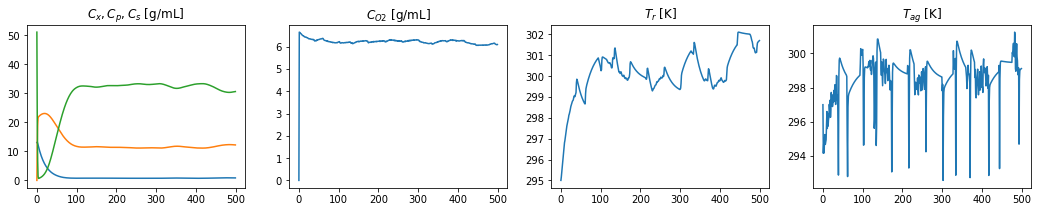

In [2]:
N = 1
solutions_name = str(N) + "_solutions.npy"
F_ag_array_name = str(N) + "_F_ag.npy"
save_dir = "./saved"
os.makedirs (save_dir, exist_ok=True)

num_timesteps = 500
train_random_inputs = generate_inputs (N)
solutions, F_ag_array = generate_ode_data(train_random_inputs, num_timesteps)

print ("="*50)
print ("Saved: ")
print (f"{solutions_name}: {solutions.shape}")
print (f"{F_ag_array_name}: {F_ag_array.shape}")
print ("="*50)

# SAVE
np.save (join(save_dir, solutions_name), solutions)
np.save (join(save_dir, F_ag_array_name), F_ag_array)

# PLOT
plot_ode_solutions (solutions)

### Visualizing input and output sequences like the paper shows on page ___

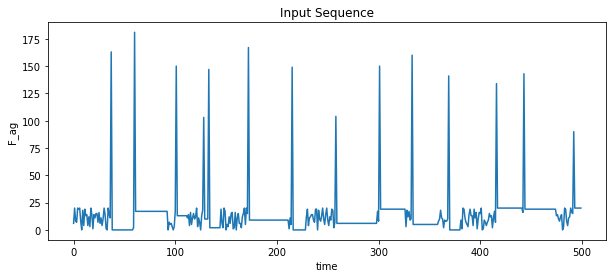

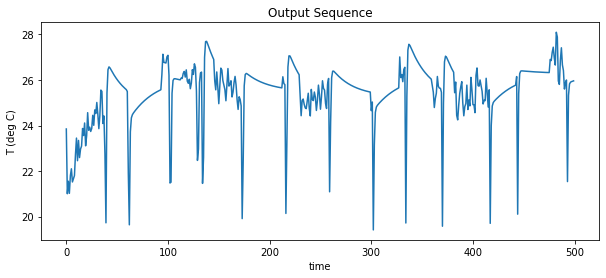

In [3]:
plt.figure(figsize = (10,4))
plt.title("Input Sequence")
plt.xlabel("time")
plt.ylabel("F_ag")
# plt.xlim(100,500)
plt.plot(F_ag_array[0,:])
plt.show()

plt.figure(figsize=(10,4))
plt.title("Output Sequence")
plt.xlabel("time")
# plt.xlim(100,500)
# plt.ylim(26,34)
plt.ylabel("T (deg C)")
plt.plot(solutions[0][-1].T - 273.15)
plt.show()

(1, 7, 500)
pre-processing data...
n: 0 data shape: (1, 7, 500)
i: 4 prev_4_reactor_temps: [295.         295.15942727 295.37150106 295.60284897] prev_4_F_ag: [ 6. 20.  8.  7.] current_temp: 295.81470633154976
i: 496 prev_4_reactor_temps: [301.14119919 301.4137181  301.58068764 301.62077229] prev_4_F_ag: [90. 20. 20. 20.] current_temp: 301.64401301448487
i: 497 prev_4_reactor_temps: [301.4137181  301.58068764 301.62077229 301.64401301] prev_4_F_ag: [20. 20. 20. 20.] current_temp: 301.6644457641876
i: 498 prev_4_reactor_temps: [301.58068764 301.62077229 301.64401301 301.66444576] prev_4_F_ag: [20. 20. 20. 20.] current_temp: 301.6838824262146
i: 499 prev_4_reactor_temps: [301.62077229 301.64401301 301.66444576 301.68388243] prev_4_F_ag: [20. 20. 20. 20.] current_temp: 301.7025771377229
preprocessing done
n: 0 data shape: torch.Size([1, 497, 9]) data.shape[1]: 497
Global iterations 100 | loss = 173.6743927001953
Global iterations 200 | loss = 3.9767186641693115
Global iterations 300 | loss

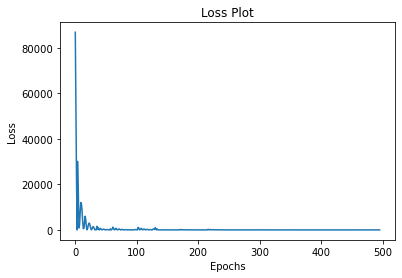

In [4]:
solutions_w_F_ag = np.concatenate((solutions, F_ag_array.reshape(N,1,num_timesteps)), axis=1)
print(solutions_w_F_ag.shape)
train_data = data_preprocessing(solutions_w_F_ag, N = N, num_timesteps = num_timesteps, batch_size = 1, shuffle = False)
print("preprocessing done")

model = NeuralNet(num_hidden_layers = 2, input_size = 8, hidden_size = 64, output_size = 1)#, device = device)
train(model, train_data, optimizer = "Adam", num_epochs = 1)

### Testing the NN

num_timesteps = 500
1/1
ODE solution found: True
Saved: 
1test_solutions.npy: (1, 6, 500)
1test_F_ag.npy: (1, 500)


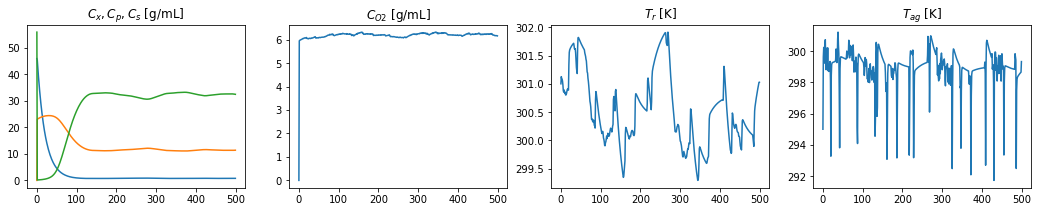

In [7]:
N = 1
test_solutions_name = str(N) + "test_solutions.npy"
test_F_ag_array_name = str(N) + "test_F_ag.npy"
save_dir = "./saved"
os.makedirs (save_dir, exist_ok=True)


test_random_inputs = generate_inputs (N)
test_solutions, test_F_ag_array = generate_ode_data(test_random_inputs, num_timesteps=500)

print ("="*50)
print ("Saved: ")
print (f"{test_solutions_name}: {test_solutions.shape}")
print (f"{test_F_ag_array_name}: {test_F_ag_array.shape}")
print ("="*50)

# SAVE
np.save (join(save_dir, test_solutions_name), test_solutions)
np.save (join(save_dir, test_F_ag_array_name), test_F_ag_array)

# PLOT
plot_ode_solutions (test_solutions)

(1, 7, 500)
pre-processing data...
n: 0 data shape: (1, 7, 500)
i: 4 prev_4_reactor_temps: [301.         301.12660288 301.08633364 301.08358003] prev_4_F_ag: [ 5. 16.  4.  5.] current_temp: 301.04924345056395
i: 496 prev_4_reactor_temps: [300.78972153 300.83301703 300.87470454 300.91484459] prev_4_F_ag: [19. 19. 19. 19.] current_temp: 300.9534948417392
i: 497 prev_4_reactor_temps: [300.83301703 300.87470454 300.91484459 300.95349484] prev_4_F_ag: [19. 19. 19. 19.] current_temp: 300.9907107070802
i: 498 prev_4_reactor_temps: [300.87470454 300.91484459 300.95349484 300.99071071] prev_4_F_ag: [19. 19. 19. 19.] current_temp: 301.02655052869915
i: 499 prev_4_reactor_temps: [300.91484459 300.95349484 300.99071071 301.02655053] prev_4_F_ag: [19. 19. 19. 12.] current_temp: 301.0275842338025
n: 0 data shape: torch.Size([1, 497, 9]) data.shape[1]: 497
predicted_current_temp: 300.4338684082031 ground_truth: 301.04925537109375
predicted_current_temp: 300.53887939453125 ground_truth: 300.9812316894

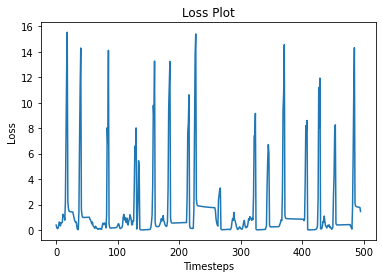

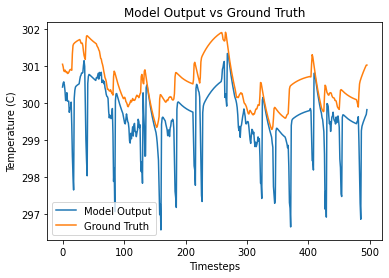

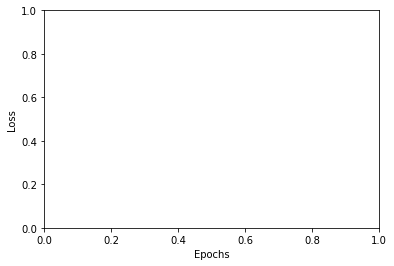

In [8]:
test_solutions_w_F_ag = np.concatenate((test_solutions, test_F_ag_array.reshape(N,1,num_timesteps)), axis=1)
print(test_solutions_w_F_ag.shape)
test_data = data_preprocessing(test_solutions_w_F_ag,N = N, num_timesteps = num_timesteps, batch_size = 1, shuffle = False)
# print(test_data.size)

test(model, test_data)